## Name: Marwan Ahmed Hassen Ali
## ID: 22
## Email: marwanhasssen999@gmail.com

# Outlines
#### 1. Fix Rating
#### 2. Fix Size
#### 3. Fix Price
#### 4. Fix Category
#### 5. Fix Android Version
#### 6. Handle Missing Values
#### 7. Outlier Detection and Handling
#### 8. Fix anything need fixing

### Data description
| **Column Name**    | **Description**                                                                                   |
|---------------------|---------------------------------------------------------------------------------------------------|
| Application name    | Name of the application                                                                          |
| Sort ascending      | Sort in ascending order                                                                          |
| Sort descending     | Sort in descending order                                                                         |
| Category            | The app belongs to a specific category                                                          |
| Rating              | Overall user rating of the app (as when scraped)                                                |
| Reviews             | Number of user reviews for the app (as when scraped)                                            |
| Size                | Size of the app (as when scraped)                                                               |
| Installs            | Number of user downloads/installs for the app (as when scraped)                                 |
| Type                | Whether the app is paid or free                                                                 |
| Price               | Price of the app (as when scraped)                                                              |
| Content Rating      | Age group the app is targeted at (e.g., Children / Mature 21+ / Adult)                          |
| Genres              | An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to multiple genres. |


In [168]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [169]:
df = pd.read_csv("googleplaystore.csv")
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6510,BN Pro PercentXL-b Neon HD Txt,LIBRARIES_AND_DEMO,4.000,45,842k,"5,000+",Free,0,Everyone,Libraries & Demo,"February 5, 2017",2.3.2,1.6 and up
9495,ek tuhi,VIDEO_PLAYERS,4.700,316,2.8M,"10,000+",Free,0,Everyone,Video Players & Editors,"July 4, 2014",1.0,4.0 and up
5902,Arizona Trail,TRAVEL_AND_LOCAL,4.700,65,13M,"5,000+",Free,0,Everyone,Travel & Local,"April 6, 2017",6.0.19,4.1 and up
5354,I am Rich Plus,FAMILY,4.000,856,8.7M,"10,000+",Paid,$399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
3649,"GO Weather - Widget, Theme, Wallpaper, Efficient",WEATHER,4.500,1422858,Varies with device,"50,000,000+",Free,0,Everyone,Weather,"August 3, 2018",Varies with device,Varies with device


##  Data cleaning
###  Investegation

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [172]:
df.describe()

,Rating
count,9367.000
mean,4.193
std,0.537
min,1.000
25%,4.000
50%,4.300
75%,4.500
max,19.000


In [173]:
df.duplicated().sum()

483


> Dropping duplicated columns

In [175]:
df.drop_duplicates(inplace=True)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 1. Fix Rating

In [178]:
print(df["Rating"].unique())

[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]


> #### there is an outlier (19) because Rating is between 1 and 5

In [180]:
index = df[df["Rating"] == 19].index
df.drop(index,axis = 0,inplace = True)

> #### Now we replace the NaN values with the mean of other ratings

In [182]:
mean_size = df['Rating'].mean(skipna = True)
df['Rating'].fillna(round(mean_size,2),inplace = True)

C:\Users\DMKE\AppData\Local\Temp\ipykernel_9092\114490931.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [183]:
df['Rating'].unique()

array([4.1 , 3.9 , 4.7 , 4.5 , 4.3 , 4.4 , 3.8 , 4.2 , 4.6 , 3.2 , 4.  ,
       4.19, 4.8 , 4.9 , 3.6 , 3.7 , 3.3 , 3.4 , 3.5 , 3.1 , 5.  , 2.6 ,
       3.  , 1.9 , 2.5 , 2.8 , 2.7 , 1.  , 2.9 , 2.3 , 2.2 , 1.7 , 2.  ,
       1.8 , 2.4 , 1.6 , 2.1 , 1.4 , 1.5 , 1.2 ])

> #### All the values of Rating column are floats between 1 and 5 

> #### Visualizing Rating :

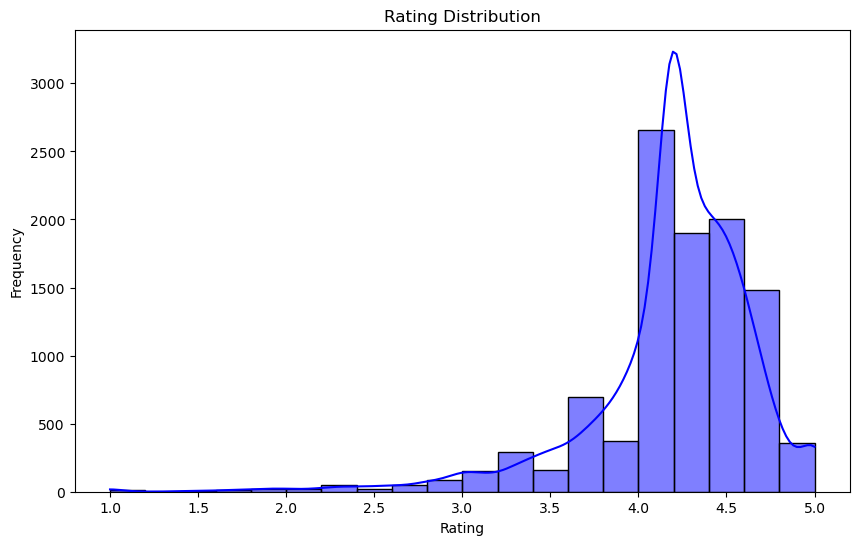

In [308]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## 2. Fix size

> #### There are 3 types of inputs in Size column: MB , KB and "Varies with device"   

In [189]:
len(df[df["Size"] == "Varies with device"])

1526


> ####  Standardize units for consistency
> > Solution: Convert all to megabytes (MB)
> ####  There are 1526 entries with "Varies with device"
>> Solution: Replace it with the mean of other Apps
> ####  Convert it to float 

In [191]:
def parse_size(string):
    if 'M' in string:
        return round(float(string[:-1]),3)
    elif 'k' in string:    
         return round(float(string[:-1]) / 1000, 3)
    elif string == "Varies with device":
        return np.nan
    return np.nan
    
df["Size"] = df["Size"].apply(parse_size)

In [192]:
mean_size = df['Size'].mean(skipna=True)
df['Size'].fillna(mean_size,inplace = True)

C:\Users\DMKE\AppData\Local\Temp\ipykernel_9092\387675112.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





> #### Rename the "Size" column to "Size (MB)" to indicate that all values are in megabytes.

In [194]:
df.rename(columns={'Size': 'Size (MB)'}, inplace=True)

> #### Make the all floats to the nearest 3 decemal places for better readabilty.

In [196]:
pd.options.display.float_format = '{:.3f}'.format
df["Size (MB)"].describe()

count   10357.000
mean       21.288
std        20.813
min         0.009
25%         5.700
50%        17.000
75%        26.000
max       100.000
Name: Size (MB), dtype: float64

> #### Visualizing Size (MB) :

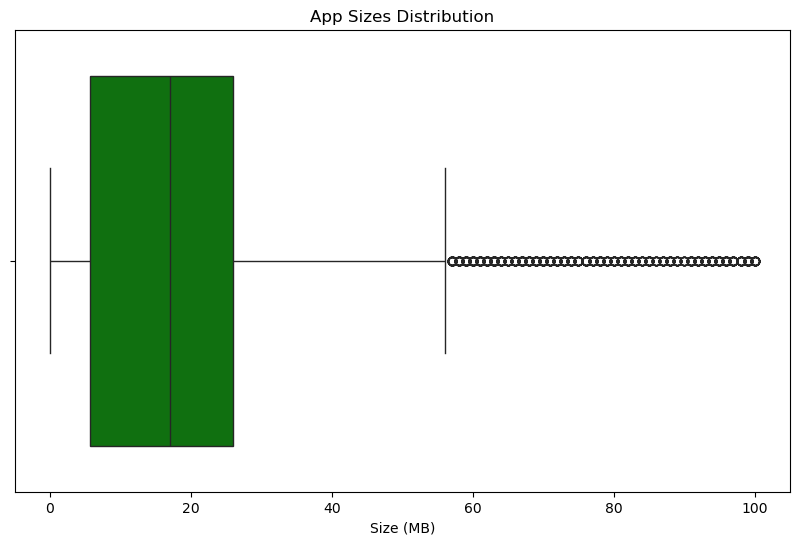

In [310]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Size (MB)'], color='green')
plt.title('App Sizes Distribution')
plt.xlabel('Size (MB)')
plt.show()

## 3. Fix Price

> ####  Convert it to float

In [201]:
print(df["Price"].unique())

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' '$1.20'
 '$1.04']


In [202]:
def parse_Price(string):
    if string != "0":
        return round(float(string[1:]),3)
    else:
        return 0
        
df["Price"] = df["Price"].apply(parse_Price)

In [203]:
print(df["Price"].describe())

count   10357.000
mean        1.031
std        16.279
min         0.000
25%         0.000
50%         0.000
75%         0.000
max       400.000
Name: Price, dtype: float64


> ####  Do a Log Transformation to visualize the data better

In [205]:
Price = df['Price'].apply(lambda x: np.log(x + 1))

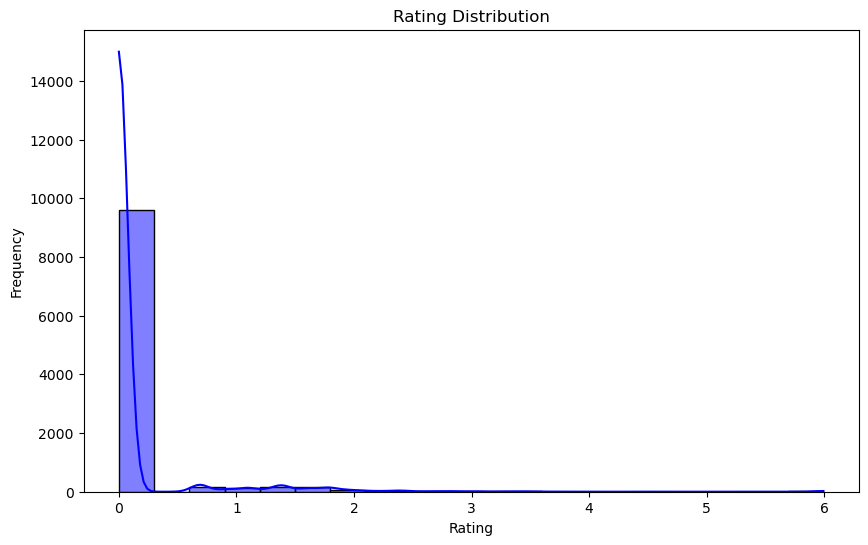

In [318]:
plt.figure(figsize=(10, 6))
sns.histplot(Price, bins=20, kde=True, color='blue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## 4. Fix Category

> ####  check the name of each row and make sure that there is no any duplicates

In [209]:
print(df["Category"].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


> ####  Make sure there is no NaN values

In [211]:
len(df[df['Category'].isna()])

0

> #### Visualizing Category

C:\Users\DMKE\AppData\Local\Temp\ipykernel_9092\81276065.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




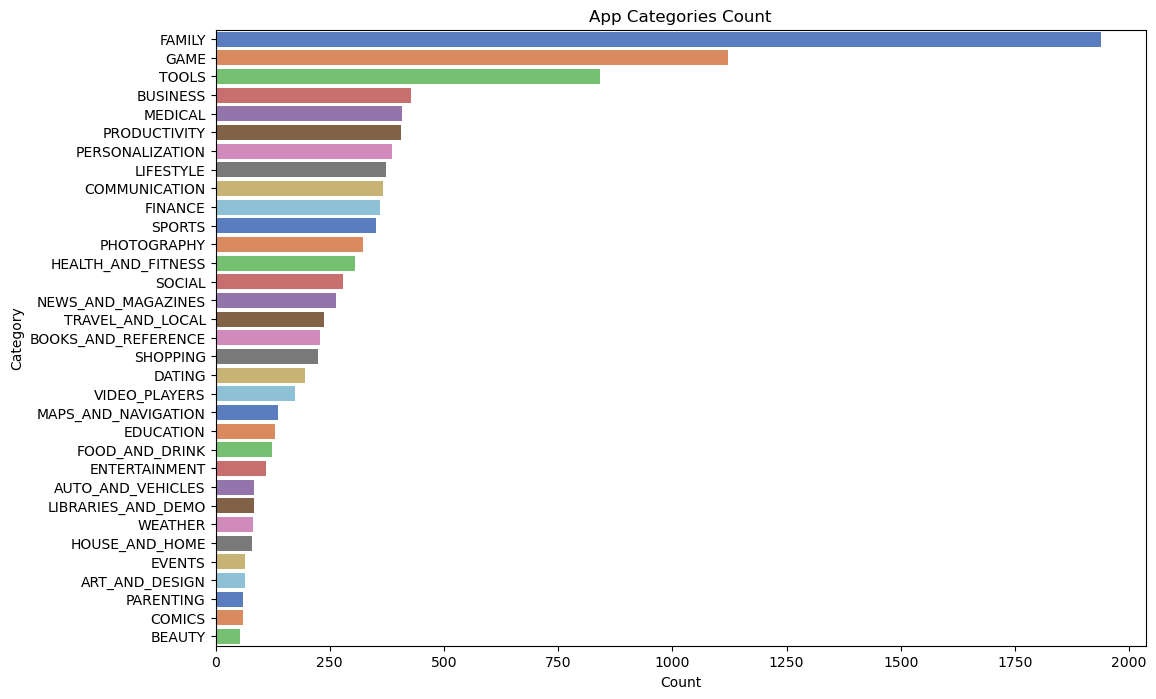

In [314]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=df, palette='muted', order=df['Category'].value_counts().index)
plt.title('App Categories Count')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

## 5. Fix Android Version

> ####  No need to convert it to float as it's range 

In [216]:
print(df["Android Ver"].unique())

['4.0.3 and up' '4.2 and up' '4.4 and up' '2.3 and up' '3.0 and up'
 '4.1 and up' '4.0 and up' '2.3.3 and up' 'Varies with device'
 '2.2 and up' '5.0 and up' '6.0 and up' '1.6 and up' '1.5 and up'
 '2.1 and up' '7.0 and up' '5.1 and up' '4.3 and up' '4.0.3 - 7.1.1'
 '2.0 and up' '3.2 and up' '4.4W and up' '7.1 and up' '7.0 - 7.1.1'
 '8.0 and up' '5.0 - 8.0' '3.1 and up' '2.0.1 and up' '4.1 - 7.1.1' nan
 '5.0 - 6.0' '1.0 and up' '2.2 - 7.1.1' '5.0 - 7.1.1']


> ####  Make sure there is no NaN values

In [218]:
len(df[df['Android Ver'].isna()])

2

In [219]:
df = df.dropna(subset=['Android Ver'])
len(df[df['Android Ver'].isna()])

0

> #### Visualizing Android Version

In [221]:
px.histogram(df['Android Ver'])

## 6. Handle Missing Values

> ####  There is NaN values in Type and current Ver

> ####  We can drop them since they are very small

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10355 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10355 non-null  object 
 1   Category        10355 non-null  object 
 2   Rating          10355 non-null  float64
 3   Reviews         10355 non-null  object 
 4   Size (MB)       10355 non-null  float64
 5   Installs        10355 non-null  object 
 6   Type            10354 non-null  object 
 7   Price           10355 non-null  float64
 8   Content Rating  10355 non-null  object 
 9   Genres          10355 non-null  object 
 10  Last Updated    10355 non-null  object 
 11  Current Ver     10347 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [226]:
df = df.dropna(subset=['Type'])
df = df.dropna(subset=['Current Ver'])

In [227]:
px.histogram(df['Type'])

C:\Users\DMKE\AppData\Local\Temp\ipykernel_9092\96407836.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




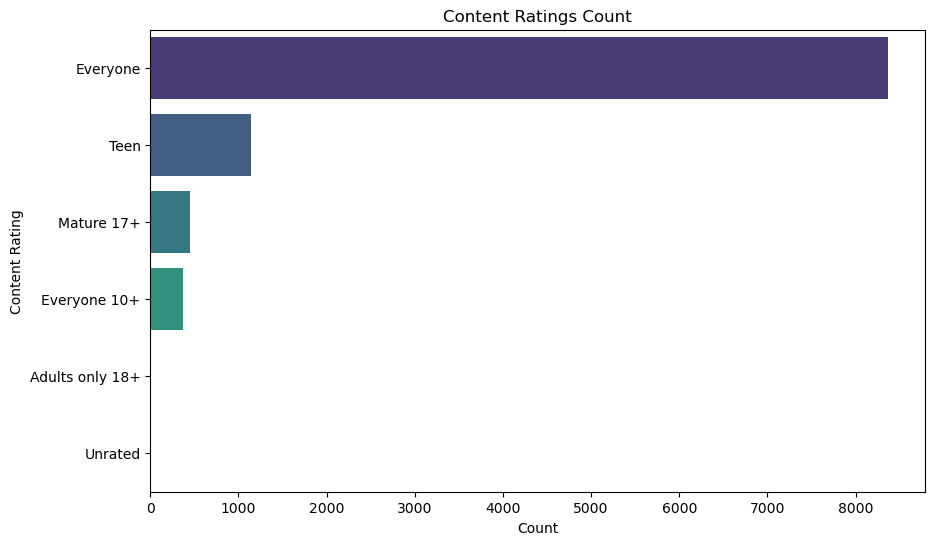

In [312]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Content Rating', data=df, palette='viridis', order=df['Content Rating'].value_counts().index)
plt.title('Content Ratings Count')
plt.xlabel('Count')
plt.ylabel('Content Rating')
plt.show()

## 7 is aleardy done in the above steps

## 8. Fix anything need fixing

> ####  Convert Reviews to Integers

In [231]:
df["Reviews"] = df["Reviews"].apply(lambda x: int(x))

In [232]:
df["Reviews"].describe()

count      10346.000
mean      406333.771
std      2698179.074
min            0.000
25%           32.000
50%         1688.500
75%        46598.250
max     78158306.000
Name: Reviews, dtype: float64

> ####  Convert Installs to Integers

In [234]:
df["Installs"] = df["Installs"].str.replace(",", "").str.replace("+", "").astype(int)
df["Installs"].describe()

count        10346.000
mean      14172659.716
std       80280899.857
min              0.000
25%           1000.000
50%         100000.000
75%        1000000.000
max     1000000000.000
Name: Installs, dtype: float64

# Analytical Questions

## 1. What is the most expensive app on the Play Store?

In [237]:
app = df[df["Price"] == df["Price"].max()].iloc[0,0]
print("The most expensive app on the Play Store is:", app)
df[df["Price"] == df["Price"].max()]


The most expensive app on the Play Store is: I'm Rich - Trump Edition


,App,Category,Rating,Reviews,Size (MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.600,275,7.300,10000,Paid,400.000,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


## 2. Which genre has the highest number of apps?

In [239]:
mode = df["Genres"].mode()
size = len(df[df["Genres"] == mode[0]])
print("The genre with the highest number of apps is:", mode[0],"with",size,"apps")


The genre with the highest number of apps is: Tools with 840 apps


## 3. What is the average size of free vs. paid apps?

In [241]:
average_size = df.groupby('Type')['Size (MB)'].mean()
print("The average size of free apps is",round(average_size.iloc[0],3),"MB")
print("The average size of paid apps is",round(average_size.iloc[1],3),"MB")


The average size of free apps is 21.457 MB
The average size of paid apps is 19.377 MB


## 4. What are the top 5 most expensive apps with a perfect rating (5)?

In [243]:
rating_5 = df[df["Rating"] == 5]
top_5 = rating_5.sort_values("Price",ascending=False)
print("1.",top_5.iloc[0,0],", with price of",top_5.iloc[0,7],"$")
print("2.",top_5.iloc[1,0],", with price of",top_5.iloc[1,7],"$")
print("3.",top_5.iloc[2,0],", with price of",top_5.iloc[2,7],"$")
print("4.",top_5.iloc[3,0],", with price of",top_5.iloc[3,7],"$")
print("5.",top_5.iloc[4,0],", with price of",top_5.iloc[4,7],"$")
top_5.head(5)

1. AP Art History Flashcards , with price of 29.99 $
2. USMLE Step 2 CK Flashcards , with price of 19.99 $
3. Hey AJ! It's Bedtime! , with price of 4.99 $
4. meStudying: AP English Lit , with price of 4.99 $
5. TI-84 CE Graphing Calculator Manual TI 84 , with price of 4.99 $


,App,Category,Rating,Reviews,Size (MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5489,AP Art History Flashcards,FAMILY,5.000,1,96.000,10,Paid,29.990,Mature 17+,Education,"January 19, 2016",3.30,4.0 and up
7477,USMLE Step 2 CK Flashcards,FAMILY,5.000,1,40.000,10,Paid,19.990,Everyone,Education,"May 26, 2014",2.47,2.2 and up
5246,Hey AJ! It's Bedtime!,FAMILY,5.000,1,63.000,10,Paid,4.990,Everyone,Education,"April 4, 2018",1.0.59,2.3 and up
5482,meStudying: AP English Lit,FAMILY,5.000,1,0.655,10,Paid,4.990,Everyone,Education,"August 31, 2013",1.3,2.0.1 and up
7204,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.000,1,27.000,100,Paid,4.990,Everyone,Education,"March 28, 2018",1.5.2,4.1 and up


## 5. How many apps have received more than 50K reviews?

In [245]:
length = len(df[df["Reviews"]>50000])
print("There are",length,"apps that received more than 50K reviews.")

There are 2525 apps that received more than 50K reviews.


## 6. What is the average price of apps, grouped by genre and number of installs?

In [247]:
grouped = df.groupby(["Genres", "Installs"])["Price"].mean().reset_index()
grouped.sample(5)

,Genres,Installs,Price
319,Education;Education,5000,2.245
188,Casino,100,7.000
373,Educational;Pretend Play,5000,2.990
312,Education;Creativity,500000,0.000
587,Parenting,10000,0.000


## 7. How many apps have a rating higher than 4.7, and what is their average price?

In [249]:
rating_4_7 = df[df["Rating"]>4.7]
averege = rating_4_7["Price"].mean()
print("There are",len(rating_4_7),"apps have a rating higher than 4.7")
print("The average of their price is",averege)

There are 586 apps have a rating higher than 4.7
The average of their price is 0.455


## 8. What is Google's estimated revenue from apps with 5,000,000+ installs? (Assuming Google takes a 30% cut from app sales)

In [251]:
filtered_df = df[df["Installs"] >= 5000000]
Total_Revenue = filtered_df["Price"] * filtered_df["Installs"]
Google_Revenue = Total_Revenue * 0.3
print("Google's estimated revenue from apps with 5,000,000+ installs is:",Google_Revenue.sum(),"$")

Google's estimated revenue from apps with 5,000,000+ installs is: 44910000.0 $


## 9. What are the maximum and minimum sizes of free vs. paid apps?

In [253]:
max_size = df.groupby('Type')['Size (MB)'].max()
min_size = df.groupby('Type')['Size (MB)'].min()
print("Maximum size in free apps: ",max_size.iloc[0],"MB")
print("Minimum size in free apps: ",min_size.iloc[0],"MB")
print("Maximum size in paid apps: ",max_size.iloc[1],"MB")
print("Minimum size in paid apps: ",min_size.iloc[1],"MB")

Maximum size in free apps:  100.0 MB
Minimum size in free apps:  0.009 MB
Maximum size in paid apps:  100.0 MB
Minimum size in paid apps:  0.014 MB


## 10. Is there a correlation between an app’s rating, number of reviews, size, and its price?

           Rating  Reviews  Size (MB)  Price
Rating      1.000    0.069      0.073 -0.021
Reviews     0.069    1.000      0.130 -0.009
Size (MB)   0.073    0.130      1.000 -0.024
Price      -0.021   -0.009     -0.024  1.000


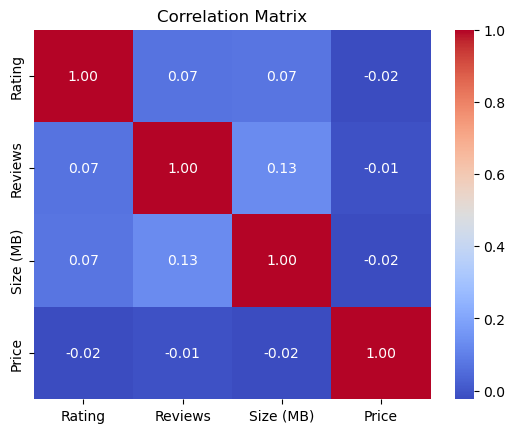

In [255]:
correlation_matrix = df[["Rating", "Reviews", "Size (MB)", "Price"]].corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 11. How many apps exist for each type (free/paid) across different content ratings?

In [257]:
type_content_counts = df.groupby(["Type", "Content Rating"]).size().reset_index(name="Count")
print(type_content_counts)

   Type   Content Rating  Count
0  Free  Adults only 18+      3
1  Free         Everyone   7713
2  Free     Everyone 10+    344
3  Free       Mature 17+    428
4  Free             Teen   1094
5  Free          Unrated      2
6  Paid         Everyone    659
7  Paid     Everyone 10+     32
8  Paid       Mature 17+     19
9  Paid             Teen     52


## 12. How many apps are compatible with Android version 4.x?

In [259]:
mask = df["Android Ver"].apply(lambda x: True if "4" in x else False)
count = len(df[mask])
print("There are",count,"apps that are compatible with Android version 4.x")

There are 6694 apps that are compatible with Android version 4.x
